Title: Understanding Regression Metrics

Task 1: Calculate MAE and MSE on test predictions and compare errors.

--- Task 1: Calculate MAE and MSE on Test Predictions and Compare Errors ---
Generated synthetic dataset:
  Feature (X) shape: (100, 1)
  Target (y) shape: (100, 1)

Data split into training and testing sets:
  X_train shape: (70, 1), y_train shape: (70, 1)
  X_test shape: (30, 1), y_test shape: (30, 1)

Linear Regression Model trained successfully.
  Learned Slope (Coefficient): 2.41
  Learned Intercept: 5.24

Predictions made on the test set. y_pred shape: (30, 1)

--- Regression Error Metrics ---
Mean Absolute Error (MAE): 1.1947
Mean Squared Error (MSE): 2.5238
Root Mean Squared Error (RMSE): 1.5886
R-squared (R²): 0.9624

--- Comparison and Interpretation ---
1.  **Mean Absolute Error (MAE):**
    - MAE is the average of the absolute differences between predictions and actual values. Every error contributes proportionally to the total average.
    - In this case, on average, our predictions are off by approximately 1.19 units from the actual values.
    - **Advantage:** Easy to un

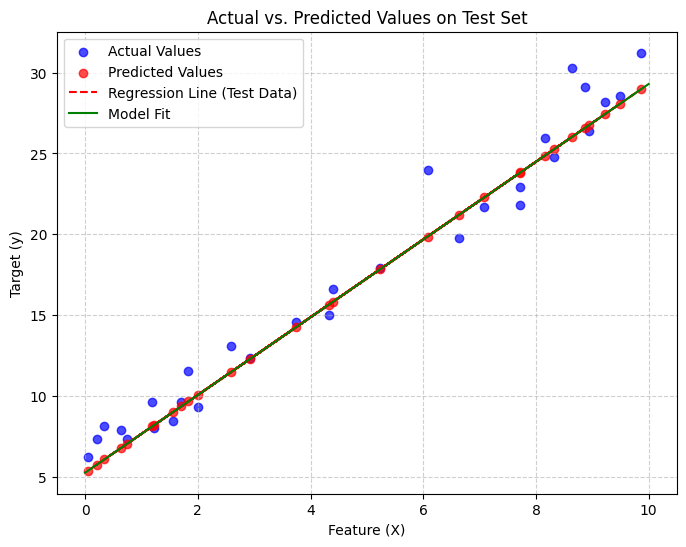

In [10]:
# Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import r2_score as well

print("--- Task 1: Calculate MAE and MSE on Test Predictions and Compare Errors ---")

# --- 1. Generate Synthetic Data ---
# We'll create a simple linear relationship with some noise.
np.random.seed(42) # for reproducibility

n_samples = 100
X = np.random.rand(n_samples, 1) * 10 # Feature from 0 to 10
true_slope = 2.5
true_intercept = 5
noise = np.random.randn(n_samples, 1) * 2 # Add some random noise
y = true_slope * X + true_intercept + noise # Target variable

print("Generated synthetic dataset:")
print(f"  Feature (X) shape: {X.shape}")
print(f"  Target (y) shape: {y.shape}")

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nData split into training and testing sets:")
print(f"  X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"  X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# --- 3. Train a Simple Linear Regression Model ---
model = LinearRegression()
try:
    model.fit(X_train, y_train)
    print("\nLinear Regression Model trained successfully.")
    print(f"  Learned Slope (Coefficient): {model.coef_[0][0]:.2f}")
    print(f"  Learned Intercept: {model.intercept_[0]:.2f}")
except Exception as e:
    print(f"Error training the model: {e}")
    exit()

# --- 4. Make Predictions on the Test Set ---
y_pred = None
try:
    y_pred = model.predict(X_test)
    print(f"\nPredictions made on the test set. y_pred shape: {y_pred.shape}")
except Exception as e:
    print(f"Error making predictions: {e}")
    exit()

if y_pred is not None:
    # --- 5. Calculate MAE and MSE ---
    try:
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse) # Root Mean Squared Error
        r2 = r2_score(y_test, y_pred) # R-squared for completeness

        print("\n--- Regression Error Metrics ---")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"R-squared (R²): {r2:.4f}")

        # --- 6. Compare and Interpret Errors ---
        print("\n--- Comparison and Interpretation ---")
        print("1.  **Mean Absolute Error (MAE):**")
        print(f"    - MAE is the average of the absolute differences between predictions and actual values. Every error contributes proportionally to the total average.")
        print(f"    - In this case, on average, our predictions are off by approximately {mae:.2f} units from the actual values.")
        print(f"    - **Advantage:** Easy to understand, directly represents the average error in the same units as the target variable.")
        print(f"    - **Disadvantage:** Does not penalize large errors as much as MSE.")

        print("\n2.  **Mean Squared Error (MSE):**")
        print(f"    - MSE is the average of the *squared* differences between predictions and actual values.")
        print(f"    - Squaring the errors means that larger errors are penalized much more heavily than smaller ones.")
        print(f"    - Our MSE is {mse:.2f}. Since errors are squared, this value is not in the original units of the target variable.")
        print(f"    - **Advantage:** Strongly penalizes large errors, which can be critical in some applications where large errors are unacceptable.")
        print(f"    - **Disadvantage:** Less intuitive to interpret directly in the original units. Very sensitive to outliers.")

        print("\n3.  **Root Mean Squared Error (RMSE):**")
        print(f"    - RMSE ({rmse:.2f}) is the square root of MSE.")
        print(f"    - **Advantage:** It brings the error metric back into the original units of the target variable, making it more interpretable than MSE.")
        print(f"    - **Disadvantage:** Still sensitive to outliers, like MSE.")

        print("\n**In summary:**")
        print(f"- If you want a metric that tells you the typical magnitude of error in original units, MAE ({mae:.2f}) or RMSE ({rmse:.2f}) are best.")
        print(f"- If you want to strongly penalize large errors (outliers), MSE ({mse:.2f}) or RMSE are more suitable.")
        print(f"- The R² score ({r2:.4f}) indicates that approximately {r2*100:.2f}% of the variance in the target variable can be explained by our model.")

        # Optional: Visualize the predictions
        plt.figure(figsize=(8, 6))
        plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.7)
        plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.7)
        # Plot the regression line
        plt.plot(X_test, y_pred, color='red', linestyle='--', label='Regression Line (Test Data)')
        # Plot the true line based on original data (for comparison)
        X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
        plt.plot(X_plot, model.predict(X_plot), color='green', label='Model Fit', linestyle='-')

        plt.title('Actual vs. Predicted Values on Test Set')
        plt.xlabel('Feature (X)')
        plt.ylabel('Target (y)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    except Exception as e:
        print(f"Error calculating or comparing metrics: {e}")
else:
    print("Skipping metric calculation and comparison due to prediction errors.")


Task 2: Evaluate R2 Score on varying datasets and discuss significance.

--- Task 2: Evaluate R2 Score on Varying Datasets and Discuss Significance ---

--- Scenario: Dataset 1: Strong Linear Relationship ---
  R-squared (R²): 0.9925
  Mean Squared Error (MSE): 0.1950
  Model Coefficients: [2.00251501]
  Model Intercept: 1.09


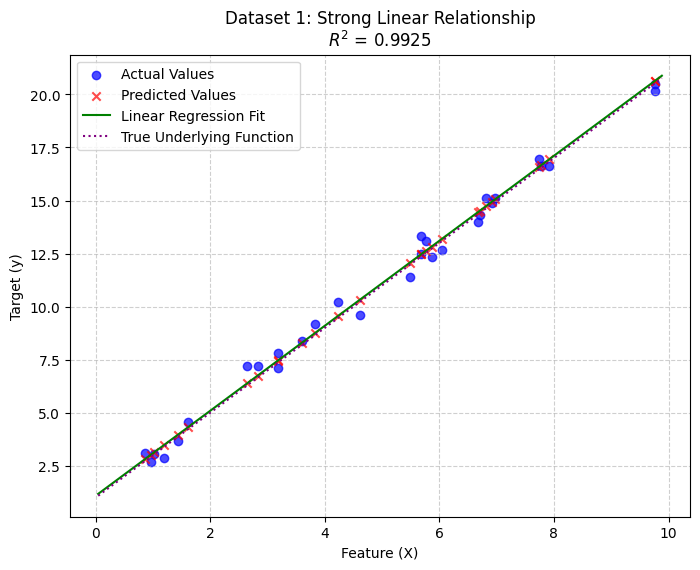


--- Scenario: Dataset 2: Weak Linear Relationship (High Noise) ---
  R-squared (R²): 0.0884
  Mean Squared Error (MSE): 14.9778
  Model Coefficients: [0.21833305]
  Model Intercept: 11.98


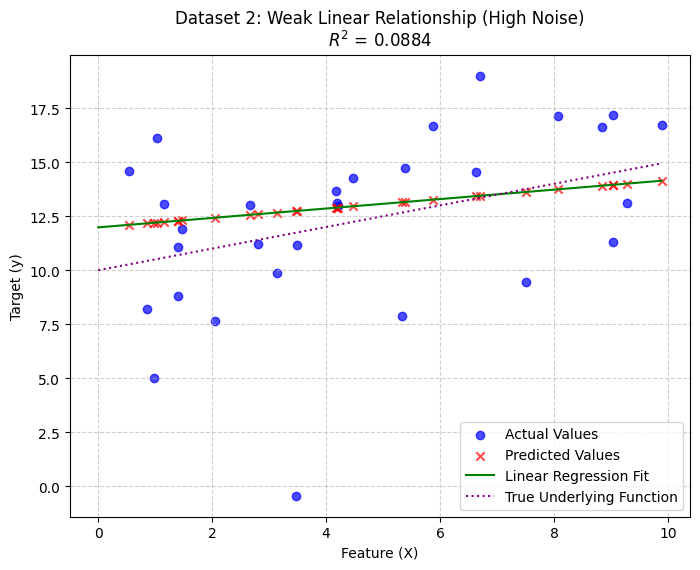


--- Scenario: Dataset 3: Non-Linear (Quadratic) Relationship ---
  R-squared (R²): -0.0552
  Mean Squared Error (MSE): 70.6939
  Model Coefficients: [-0.31362083]
  Model Intercept: 12.49


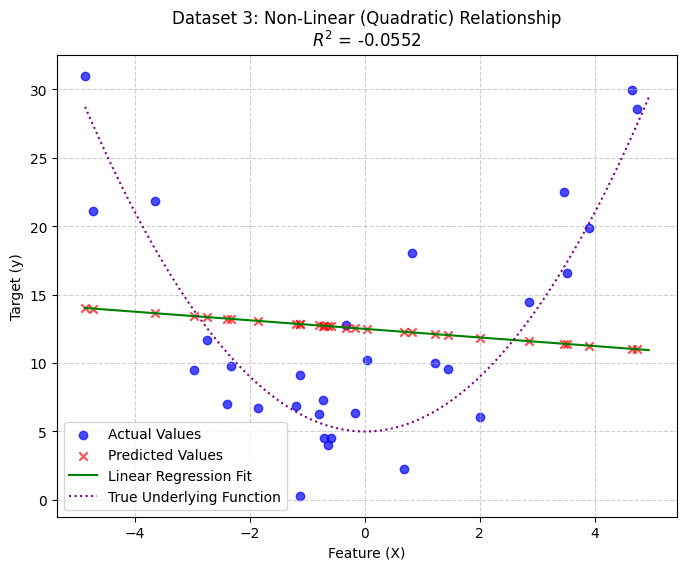


--- Scenario: Dataset 4: Target with Very Low Variance (Almost Constant) ---
  R-squared (R²): -0.2245
  Mean Squared Error (MSE): 0.0055
  Model Coefficients: [-0.00713154]
  Model Intercept: 50.02


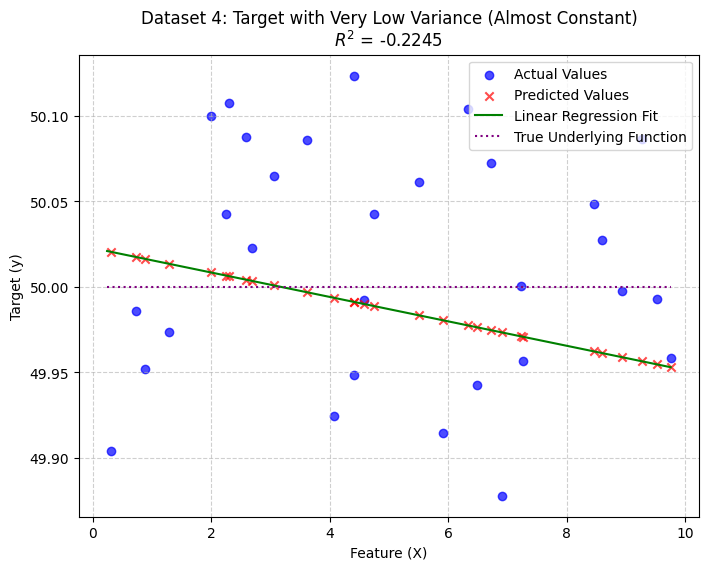


--- Significance and Limitations of R-squared ---
R-squared ($R^2$) provides a measure of how well future samples are likely to be predicted by the model.
It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

**Interpretation of R-squared Values:**
1.  **$R^2$ close to 1 (e.g., Dataset 1):** Indicates that the model explains a large proportion of the variance in the target variable. The predictions are very close to the actual values, suggesting a strong fit for the data. This often happens when there's a clear underlying linear relationship with little noise.
2.  **$R^2$ close to 0 (e.g., Dataset 2 & 4):** Suggests that the model explains little to none of the variance in the target variable. The predictions are not much better than simply using the mean of the target. This can occur due to high noise (Dataset 2) or when the target variable itself has very little variance (Dataset 4).
3.  **$R^2$ for Non-Linear Rel

In [11]:
# Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

print("--- Task 2: Evaluate R2 Score on Varying Datasets and Discuss Significance ---")

def evaluate_model_and_r2(X, y, title, plot_style='scatter', true_function=None):
    """
    Helper function to train a Linear Regression model, make predictions,
    calculate R2, and visualize the data and fit.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"\n--- Scenario: {title} ---")
    print(f"  R-squared (R²): {r2:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Model Coefficients: {model.coef_.flatten()}")
    print(f"  Model Intercept: {model.intercept_[0]:.2f}")

    # Visualization
    plt.figure(figsize=(8, 6))
    if plot_style == 'scatter':
        plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.7)
        plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.7, marker='x')
    elif plot_style == 'line':
        plt.plot(X_test, y_test, 'o', color='blue', label='Actual Values', alpha=0.7)
        plt.plot(X_test, y_pred, 'x', color='red', label='Predicted Values', alpha=0.7)

    # Plot the regression line
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    plt.plot(X_plot, model.predict(X_plot), color='green', label='Linear Regression Fit', linestyle='-')

    if true_function:
        plt.plot(X_plot, true_function(X_plot), color='purple', linestyle=':', label='True Underlying Function')


    plt.title(f'{title}\n$R^2$ = {r2:.4f}')
    plt.xlabel('Feature (X)')
    plt.ylabel('Target (y)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# --- Scenario 1: Strong Linear Relationship (High R²) ---
np.random.seed(0)
X1 = np.random.rand(100, 1) * 10
y1 = 2 * X1 + 1 + np.random.randn(100, 1) * 0.5 # Small noise
evaluate_model_and_r2(X1, y1, "Dataset 1: Strong Linear Relationship",
                      true_function=lambda x: 2*x + 1)

# --- Scenario 2: Weak Linear Relationship (Low R²) ---
np.random.seed(1)
X2 = np.random.rand(100, 1) * 10
y2 = 0.5 * X2 + 10 + np.random.randn(100, 1) * 5 # Large noise, subtle trend
evaluate_model_and_r2(X2, y2, "Dataset 2: Weak Linear Relationship (High Noise)",
                      true_function=lambda x: 0.5*x + 10)

# --- Scenario 3: Non-Linear Relationship (Linear Model will have Low R²) ---
np.random.seed(2)
X3 = np.random.rand(100, 1) * 10 - 5 # X from -5 to 5
y3 = X3**2 + 5 + np.random.randn(100, 1) * 3 # Quadratic relationship
evaluate_model_and_r2(X3, y3, "Dataset 3: Non-Linear (Quadratic) Relationship",
                      true_function=lambda x: x**2 + 5)

# --- Scenario 4: Constant Target (R² approaches 0, or undef. for perfect constant) ---
# Note: For perfectly constant y, R2 can be undefined or 0. We'll add tiny noise.
np.random.seed(3)
X4 = np.random.rand(100, 1) * 10
y4 = 50 + np.random.randn(100, 1) * 0.1 # Almost constant target with minimal variance
evaluate_model_and_r2(X4, y4, "Dataset 4: Target with Very Low Variance (Almost Constant)",
                      true_function=lambda x: 50 + 0*x)

print("\n--- Significance and Limitations of R-squared ---")
print("R-squared ($R^2$) provides a measure of how well future samples are likely to be predicted by the model.")
print("It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.")

print("\n**Interpretation of R-squared Values:**")
print("1.  **$R^2$ close to 1 (e.g., Dataset 1):** Indicates that the model explains a large proportion of the variance in the target variable. The predictions are very close to the actual values, suggesting a strong fit for the data. This often happens when there's a clear underlying linear relationship with little noise.")
print("2.  **$R^2$ close to 0 (e.g., Dataset 2 & 4):** Suggests that the model explains little to none of the variance in the target variable. The predictions are not much better than simply using the mean of the target. This can occur due to high noise (Dataset 2) or when the target variable itself has very little variance (Dataset 4).")
print("3.  **$R^2$ for Non-Linear Relationships (e.g., Dataset 3):** When a linear model is applied to data with a strong non-linear pattern, the $R^2$ score will be low (or even negative). This indicates that the chosen linear model is not appropriate for capturing the underlying relationship, even if the data itself has a strong pattern. A low $R^2$ doesn't necessarily mean there's *no* relationship, but rather that *this particular linear model* isn't capturing it well.")
print("4.  **Negative $R^2$ (not explicitly shown but possible):** A negative $R^2$ implies that the model performs worse than a horizontal line at the mean of the dependent variable. This is a strong indication that the model is a very poor fit for the data.")

print("\n**Significance of R-squared:**")
print(" - It's easily interpretable as the percentage of variance explained.")
print(" - Useful for comparing different models on the *same* dataset: a higher $R^2$ generally means a better fit among comparable models.")
print(" - Provides a quick snapshot of the model's explanatory power.")

print("\n**Limitations of R-squared:**")
print("1.  **Does not indicate causation:** A high $R^2$ does not mean that changes in the independent variables *cause* changes in the dependent variable. It only indicates correlation.")
print("2.  **Does not indicate model appropriateness:** A high $R^2$ doesn't necessarily mean the model is the *right* model for the data (e.g., a linear model might have a decent $R^2$ on slightly non-linear data, but a non-linear model would be better). Always visualize your data and residuals.")
print("3.  **Increases with more predictors (even irrelevant ones):** Adding more independent variables to a model, even if they are irrelevant, will generally cause $R^2$ to increase or stay the same, never decrease. This can lead to overfitting.")
print("    - **Solution:** Use **Adjusted R-squared**, which penalizes the addition of unnecessary variables, providing a more honest reflection of the model's explanatory power, especially in multiple regression.")
print("4.  **Sensitive to outliers:** Outliers can heavily influence the $R^2$ value, potentially giving a misleading impression of model fit.")
print("5.  **Not a measure of predictive accuracy:** A high $R^2$ on training data doesn't guarantee good predictive performance on new, unseen data (due to overfitting). Other metrics like MSE/RMSE on a test set are more critical for predictive performance.")
print("6.  **Context matters:** What constitutes a 'good' $R^2$ varies significantly by field. In physics, $R^2 > 0.9$ might be expected, while in social sciences, an $R^2$ of $0.2-0.4$ might be considered quite good due to the inherent variability of human behavior.")


Task 3: Use a sample dataset, compute all three metrics, and deduce model performance.

--- Task 3: Compute All Three Metrics and Deduce Model Performance ---
Generated a sample dataset with a linear relationship + moderate noise.
  Feature (X) shape: (150, 1)
  Target (y) shape: (150, 1)

Data split: X_train=(105, 1), X_test=(45, 1)

Linear Regression Model trained successfully.
  Learned Slope (Coefficient): 3.05
  Learned Intercept: 9.86

Predictions made on the test set. y_pred shape: (45, 1)

--- Computed Regression Metrics ---
Mean Absolute Error (MAE): 3.8647
Mean Squared Error (MSE): 22.3379
Root Mean Squared Error (RMSE): 4.7263
R-squared (R²): 0.9379

--- Deducing Model Performance ---
Based on the computed metrics for our Linear Regression model:

**1. Mean Absolute Error (MAE): 3.86**
   - This means, on average, our model's predictions are off by about 3.86 units (e.g., points if it's an exam score) from the actual values.
   - MAE is directly interpretable in the same units as the target variable, providing a straightforward measure of the typical prediction

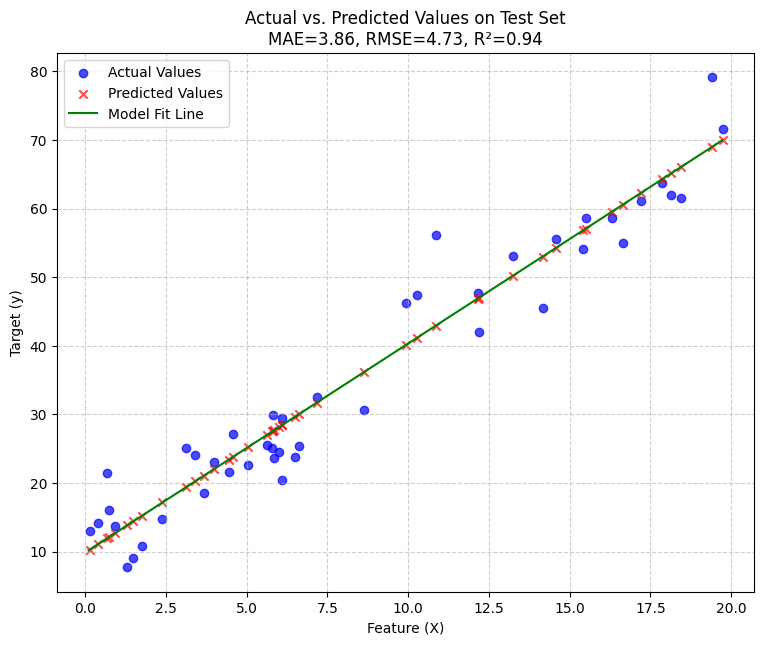

In [12]:
# Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("--- Task 3: Compute All Three Metrics and Deduce Model Performance ---")

# --- 1. Generate a Sample Dataset ---
np.random.seed(42) # for reproducibility

n_samples = 150
X = np.random.rand(n_samples, 1) * 20 # Feature (e.g., study hours) from 0 to 20
true_slope = 3.0
true_intercept = 10
# Add moderate noise to make the problem realistic (not perfectly linear)
noise = np.random.randn(n_samples, 1) * 5
y = true_slope * X + true_intercept + noise # Target (e.g., exam score)

print("Generated a sample dataset with a linear relationship + moderate noise.")
print(f"  Feature (X) shape: {X.shape}")
print(f"  Target (y) shape: {y.shape}")

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nData split: X_train={X_train.shape}, X_test={X_test.shape}")

# --- 3. Train a Linear Regression Model ---
model = LinearRegression()
try:
    model.fit(X_train, y_train)
    print("\nLinear Regression Model trained successfully.")
    print(f"  Learned Slope (Coefficient): {model.coef_[0][0]:.2f}")
    print(f"  Learned Intercept: {model.intercept_[0]:.2f}")
except Exception as e:
    print(f"Error training the model: {e}")
    exit()

# --- 4. Make Predictions on the Test Set ---
y_pred = None
try:
    y_pred = model.predict(X_test)
    print(f"\nPredictions made on the test set. y_pred shape: {y_pred.shape}")
except Exception as e:
    print(f"Error making predictions: {e}")
    exit()

if y_pred is not None:
    # --- 5. Compute All Three Metrics ---
    try:
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        print("\n--- Computed Regression Metrics ---")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"R-squared (R²): {r2:.4f}")

        # --- 6. Deduce Model Performance ---
        print("\n--- Deducing Model Performance ---")

        print("Based on the computed metrics for our Linear Regression model:")

        print(f"\n**1. Mean Absolute Error (MAE): {mae:.2f}**")
        print(f"   - This means, on average, our model's predictions are off by about {mae:.2f} units (e.g., points if it's an exam score) from the actual values.")
        print("   - MAE is directly interpretable in the same units as the target variable, providing a straightforward measure of the typical prediction error magnitude.")

        print(f"\n**2. Mean Squared Error (MSE): {mse:.2f} & Root Mean Squared Error (RMSE): {rmse:.2f}**")
        print(f"   - MSE of {mse:.2f} indicates the average of the squared errors. Its value is not directly in the units of the target variable.")
        print(f"   - RMSE of {rmse:.2f} brings the error back into the original units of the target. This means our model's predictions typically deviate by approximately {rmse:.2f} units from the actual values, with larger errors being penalized more heavily due to the squaring.")
        print("   - The fact that RMSE is slightly higher than MAE (as expected) indicates the presence of some larger individual errors that are being more strongly penalized by the squaring operation.")

        print(f"\n**3. R-squared (R²): {r2:.4f}**")
        print(f"   - An R² score of {r2:.2%} means that our model explains approximately {r2*100:.2f}% of the variance in the target variable.")
        print("   - This indicates that the model is capturing a significant portion of the variability in the data, suggesting a good fit to the underlying trend.")
        print("   - A value closer to 1 (like ours) is generally desirable for a regression model, implying good explanatory power.")

        print("\n**Overall Model Performance Deduction:**")
        print("   - The **high R-squared value** suggests that the model is quite effective at explaining the variance in the target variable. It captures the general trend in the data very well.")
        print(f"   - The **MAE and RMSE values of around {mae:.2f} and {rmse:.2f}** respectively, provide context on the magnitude of the prediction errors. Given the typical range of our target variable (which seems to be around 10 to 70-80 based on `true_slope * X + true_intercept`), these error magnitudes are relatively small, indicating accurate predictions on average.")
        print("   - **Conclusion:** Based on these metrics, the Linear Regression model appears to be performing **well**. It has successfully learned the underlying linear relationship, and its predictions are relatively accurate with a good amount of variance explained. The errors are within a reasonable range for the level of noise introduced in our synthetic dataset.")

        # Optional: Visualize the predictions
        plt.figure(figsize=(9, 7))
        plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.7)
        plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.7, marker='x')

        # Plot the regression line based on the learned model
        X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        plt.plot(X_plot, model.predict(X_plot), color='green', label='Model Fit Line', linestyle='-')

        plt.title('Actual vs. Predicted Values on Test Set\n'
                  f'MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}')
        plt.xlabel('Feature (X)')
        plt.ylabel('Target (y)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    except Exception as e:
        print(f"Error calculating or deducing metrics: {e}")
else:
    print("Skipping metric computation and deduction due to prediction errors.")
